# **ML: Linear Regression** | Model prepared using **UCI ML Repository**

---

### Student Performance Dataset
Link: *https://archive.ics.uci.edu/ml/datasets/Student+Performance*

**Libraries:** pandas, numpy, scikit-learn, matplotlib & pickle.

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
from matplotlib import style
import pickle

Mounting the datapoint /student_data/student-mat.csv

In [2]:
data = pd.read_csv("/content/student_data/student-mat.csv", sep = ";")

In [3]:
print(data.head())

  school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1     GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2     GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3     GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4     GP   F   16       U     GT3       T  ...     2       5        4   6  10  10

[5 rows x 33 columns]


Reducing no of features to only **Integer ones** that we need. As we're going to use **Linear Regression**, It's desired to only use **numerical values** as our inputs.

In [4]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

In [5]:
print(data.head())

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


Predict for **G3**

In [6]:
predict = "G3"

Using **Numpy** here

In [7]:
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

Using **Sklearn** splitting data into **four variables**. Here we're splitting the main data into four variables. Apparently reserving 10% to test and the rest 90% to train the data model.

**1.** *x_train*  **2.** *y_train*  **3.** *x_test*  **4.** *y_test*



In [8]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1) #Spliting up 10% of data for test.

Model Implementation: Linear Regression
*   Train the model
*   Print the **accuracy** of the model.
*   Commenting Out the training Process


To find the **best fit model** possible, I'm running the model for **1000000 times** in order to get the best possible fit model. After that I am storing it using **pickle.**

In [9]:
# WARNING: TIME SENSITIVE LOOP

best_acc = 0

# no of iterations for the loop to find the best model. more the merrier.
# for this dataset, I found a model of about 98.18% accuracy after running 1000000 iterations

iter = 1000000

for _ in range(iter):
  x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1) #Spliting up 10% of data for test.
  # Model Implementation
  linear = linear_model.LinearRegression()
  linear.fit(x_train, y_train)
  accuracy = linear.score(x_test, y_test)
  # print the accuracy of the model upto two decimal place.
  # print(format(accuracy*100, ".2f")+"%")
  # Saves the best model using pickle
  if accuracy > best_acc:
    best_acc = accuracy
    with open("studentmodel.pickle", "wb") as f:
      pickle.dump(linear, f)
#best model accuracy result for the test size splitted before.
print(best_acc*100)

98.1833221824261


**Loading the Model** using **Pickle**

After 1000000 iterations, a model of 98.18% accuracy was found. I saved it before, so I am loading it now.

In [10]:
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

Printing the **coefficients** & **intercept.**
5 coefficients for diff. data.

In [11]:
print('Coefficients: ', linear.coef_)
print('Vertical Intercept: ', linear.intercept_)

Coefficients:  [ 0.14859532  0.98340856 -0.17713571 -0.28337617  0.03899302]
Vertical Intercept:  -1.5396433817531587


**For the predictions:** Comparing how the **predicted value** differs from the **real value** of the test cases.

In [12]:
predictions = linear.predict(x_test)
for i in range (len(predictions)):
  print("Predicted Value: " + format(predictions[i], ".2f"), x_test[i], "\nActual Value:", y_test[i])

Predicted Value: 15.16 [15 15  2  0  2] 
Actual Value: 16
Predicted Value: 10.86 [13 11  2  0  0] 
Actual Value: 10
Predicted Value: 10.50 [11 11  3  0  3] 
Actual Value: 11
Predicted Value: 6.57 [8 8 1 3 2] 
Actual Value: 10
Predicted Value: 4.64 [ 6  5  1  0 14] 
Actual Value: 5
Predicted Value: 15.09 [15 15  2  0  0] 
Actual Value: 15
Predicted Value: 12.60 [11 13  2  0  2] 
Actual Value: 14
Predicted Value: 10.64 [11 11  2  0  2] 
Actual Value: 11
Predicted Value: 11.95 [12 12  1  0  2] 
Actual Value: 14
Predicted Value: 18.18 [16 18  2  0  0] 
Actual Value: 18
Predicted Value: 7.87 [10  8  1  0  6] 
Actual Value: 11
Predicted Value: -0.41 [10  0  2  0  0] 
Actual Value: 0
Predicted Value: 12.01 [11 12  2  0 12] 
Actual Value: 11
Predicted Value: 11.90 [13 12  3  0  6] 
Actual Value: 12
Predicted Value: 9.80 [12 10  2  0  2] 
Actual Value: 11
Predicted Value: 11.03 [11 11  2  0 12] 
Actual Value: 11
Predicted Value: 9.07 [10 10  4  0  0] 
Actual Value: 10
Predicted Value: 7.01 [7 8

Now, plotting the Data: (G3 -> Final Grades)
>   The five relations are:
1.   **Grade 1** vs Final Grade
2.   **Grade 2** vs Final Grade
3.   **Studytime** vs Final Grade
4.   **Failures** vs Final Grade
5.   **Absences** vs Final Grade




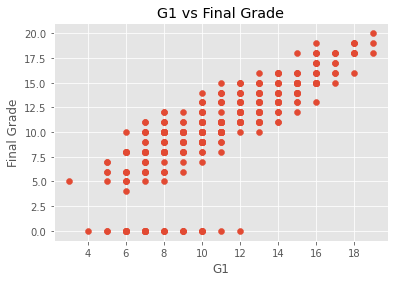

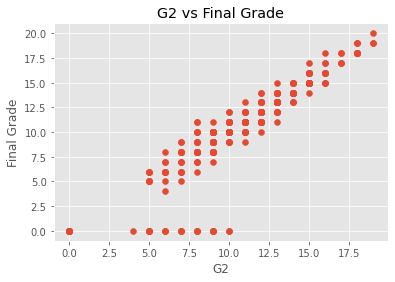

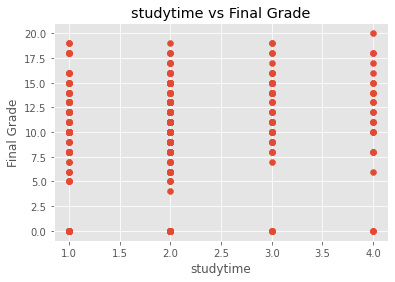

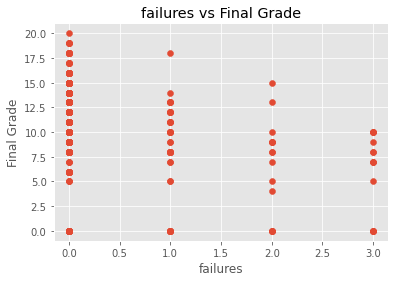

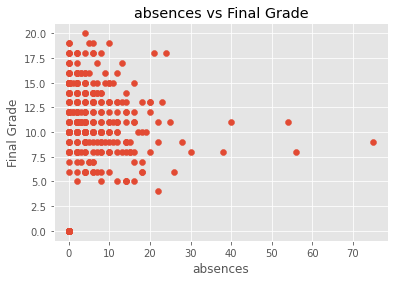

In [13]:
#with grade 1
p = 'G1'
style.use("ggplot")
pyplot.title(p+' vs Final Grade')
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()

#with grade 2
p = 'G2'
style.use("ggplot")
pyplot.title(p+' vs Final Grade')
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()

#with studytime
p = 'studytime'
style.use("ggplot")
pyplot.title(p+' vs Final Grade')
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()

#with failures
p = 'failures'
style.use("ggplot")
pyplot.title(p+' vs Final Grade')
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()

#with absences
p = 'absences'
style.use("ggplot")
pyplot.title(p+' vs Final Grade')
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()